In [50]:
% matplotlib inline
import numpy as np
from pylab import *


dt = 0.01 # 100 time steps in 1 ms
sim_time = 15 # in ms
n_steps = int(sim_time* 1/dt)
print n_steps

1500


In [51]:
u = np.zeros((n_steps))
u[0] = -65              # in mV
I_in_1 = 2*np.ones(1*int(1/dt))  # in 
I_in_2 = 7*np.ones(1*int(1/dt))
I_in_3 = 8*np.ones(7*int(1/dt))
I_in = np.concatenate((I_in_1, np.zeros(5*int(1/dt)), I_in_2, np.zeros(1*int(1/dt)),I_in_3),axis=0)
print np.shape(I_in)
#I_in = np.zeros(n_steps)
#print I_in
R_M = 7                 # in 
tau = 0.1               # in ms
u_rest = -65                 # in mv
u_thresh = -10
u_spike = 40
spike_flag = False

(1500,)


In [52]:
for i in arange(n_steps-1):    
    
    if spike_flag:
        u[i+1]=-65
        spike_flag = False
    elif u[i]>u_thresh:
        u[i+1]=u_spike
        spike_flag = True
    else:
        dudt = (u_rest + R_M*I_in[i]- u[i])/tau
        u[i+1] = u[i]+dt* dudt
        

print(u[1])
print(I_in[1])
print(u[2])
print(I_in[2])

-63.6
2.0
-62.34
2.0


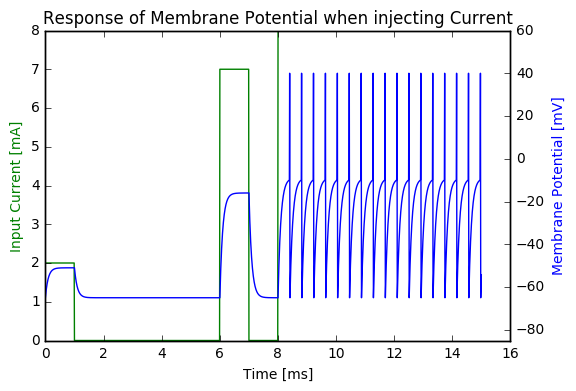

In [53]:
figure(1, figsize=(6,8))
tt = np.linspace(0, sim_time, n_steps)
fig, ax1 = subplots()

ax2 = ax1.twinx()
ax1.plot(tt, I_in, 'g-')
ax2.plot(tt, u, 'b-')

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Input Current [mA]', color='g') # which unit?
ax2.set_ylabel('Membrane Potential [mV]', color='b')
ax2.set_ylim([-85, 60])
title("Response of Membrane Potential when injecting Current")
savefig("./plots/lif_ipython.png")
show()
